# BFS路径搜索

In [19]:
# 存储城市点
wuhan, beijing, guanzhou, shengzheng, hangzhou, xian = """
        wuhan|beijing|guanzhou|shengzheng|hangzhou|xian
""".strip().split('|') 

In [20]:
# 利用字典保存 城市之间的路径
dictionary = {}
dictionary[wuhan] = [beijing, guanzhou, xian]
dictionary[beijing] = [wuhan, shengzheng, hangzhou]
dictionary[guanzhou] = [wuhan, shengzheng]
dictionary[shengzheng] = [beijing, guanzhou]
dictionary[hangzhou] = [xian, beijing]
dictionary[xian] = [wuhan, hangzhou]

In [21]:
import networkx as nx

In [22]:
Map = nx.Graph(dictionary)

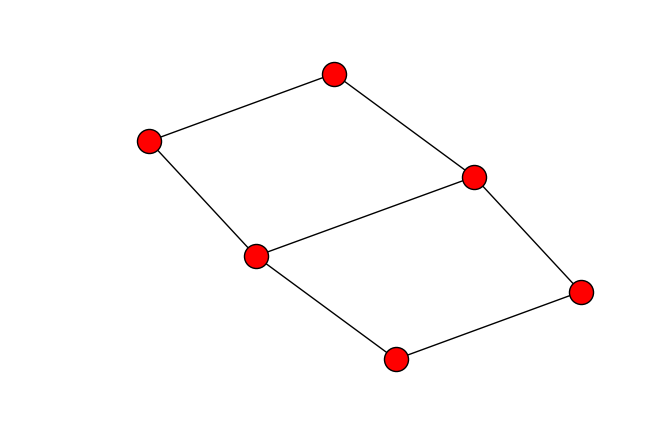

In [23]:
%matplotlib inline
nx.draw(Map)

In [37]:
def bfs_find_all_route(start, end, dictionary):
    city = list(dictionary.keys())
    if start.strip() not in city:
        print("error: 没有这个开始点")
        return -1
    if end.strip() not in city:
        print("error: 没有这个结束点")
        return -1
    
    rote = [[start]]
    path = []
    while len(rote)!=0:
        k = rote.pop(0)
        next_node = dictionary[k[-1]]
        for node in next_node:
            if node == end:
                path.append( k + [node])
                continue
            if node in k:
                continue
            
            rote.append(k + [node])  
    return path
        

In [40]:
paths = bfs_find_all_route(wuhan, beijing, dictionary)

In [44]:
print("打印从{}到{}所有可能路径".format(wuhan, beijing))
for path in paths:
    print(' -> '.join(path))

打印从wuhan到beijing所有可能路径
wuhan -> beijing
wuhan -> guanzhou -> shengzheng -> beijing
wuhan -> xian -> hangzhou -> beijing
